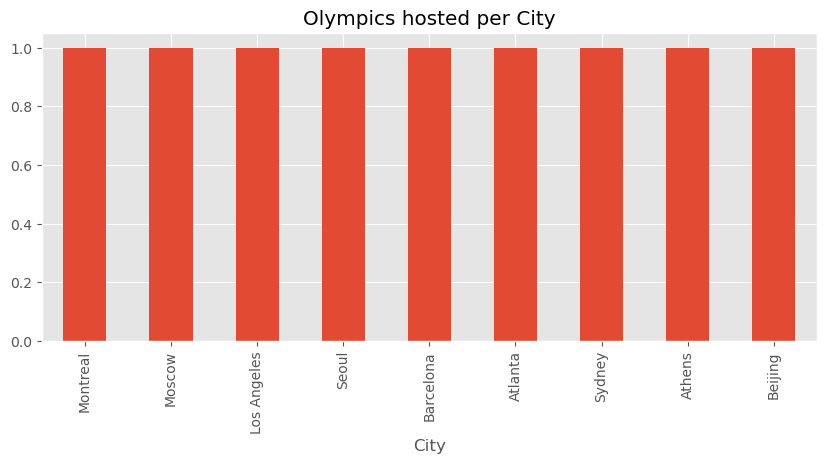

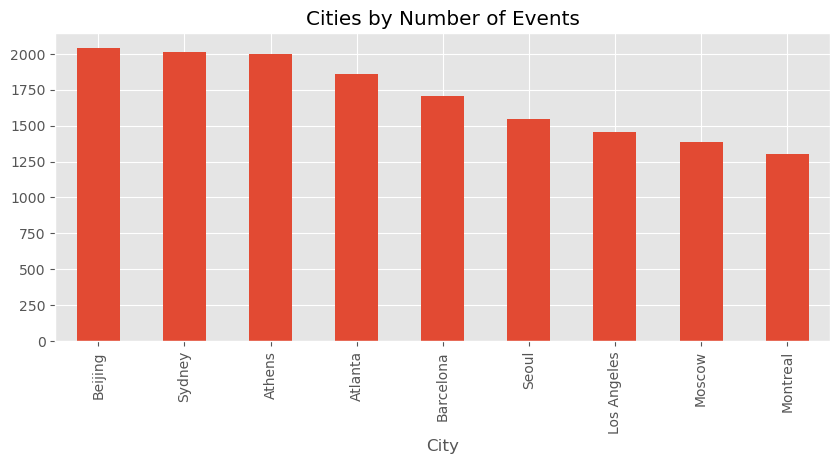

Total unique events: 334


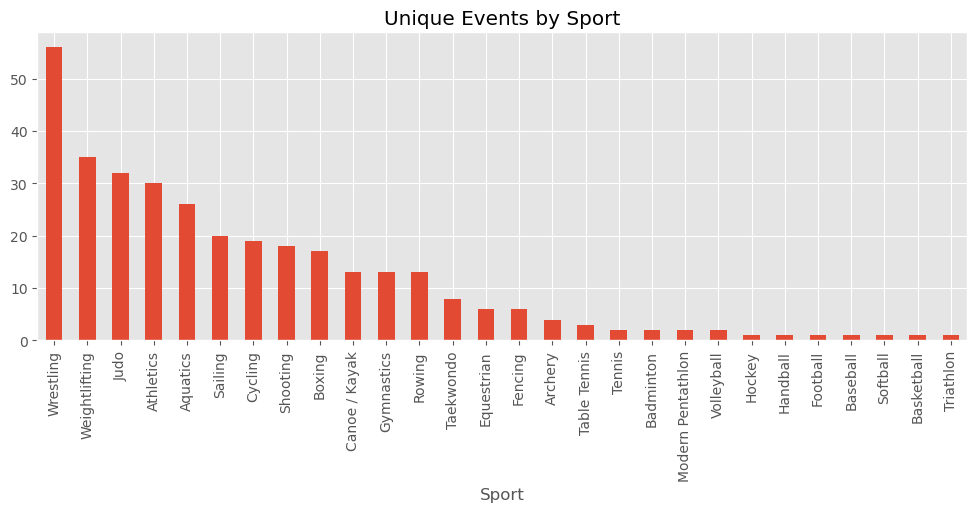

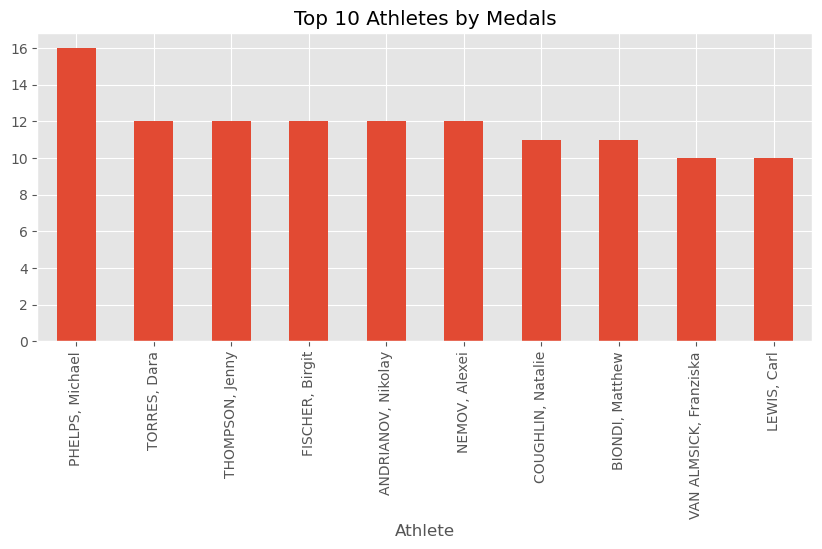

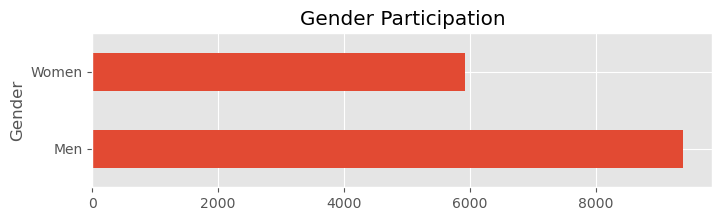

Target distribution:
 Medal
1    15316
0     6126
Name: count, dtype: int64
Accuracy: 0.7173946836623659
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1818
           1       0.72      1.00      0.84      4615

    accuracy                           0.72      6433
   macro avg       0.36      0.50      0.42      6433
weighted avg       0.51      0.72      0.60      6433



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

# Load dataset
df = pd.read_csv(r"c:\Users\Jyoti\Documents\unified_mentor_internship\Summer-Olympic-medals-1976-to-2008.csv", encoding='latin1')

# Clean the dataset
df.drop(['Event_gender', 'Country_Code'], axis=1, inplace=True)
df.dropna(how='all', inplace=True)
df['Year'] = df['Year'].astype(int)

# Visualizations
df[["City", "Year"]].drop_duplicates()['City'].value_counts().plot(kind='bar', figsize=(10, 4), title="Olympics hosted per City")
plt.show()
df['City'].value_counts().plot(kind='bar', figsize=(10, 4), title="Cities by Number of Events")
plt.show()

event_data = df[['Sport', 'Discipline', 'Event']].drop_duplicates()
print("Total unique events:", len(event_data))
event_data['Sport'].value_counts().plot(kind='bar', figsize=(12, 4), title="Unique Events by Sport")
plt.show()

top_athletes = df['Athlete'].value_counts().head(10)
top_athletes.plot(kind='bar', figsize=(10, 4), title="Top 10 Athletes by Medals")
plt.show()

df['Gender'].value_counts().plot(kind='barh', figsize=(8, 2), title="Gender Participation")
plt.show()

# -------------------------------
# Machine Learning Section
# -------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Encode features
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Sport'] = le.fit_transform(df['Sport'])
df['Gender'] = le.fit_transform(df['Gender'])

# Convert medals to binary (1 = medal)
df['Medal'] = df['Medal'].map({'Gold': 1, 'Silver': 1, 'Bronze': 1})

# 💡 Create synthetic non-winner rows (same structure, set Medal = 0)
non_medal_df = df.sample(frac=0.4, random_state=42).copy()
non_medal_df['Medal'] = 0

# Combine medal winners + non-winners
combined_df = pd.concat([df, non_medal_df])

# Show class balance
print("Target distribution:\n", combined_df['Medal'].value_counts())

# Define features and target
X = combined_df[['Country', 'Sport', 'Gender']]
y = combined_df['Medal']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

